In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data_L=pd.read_csv("L.csv")
data_i=pd.read_csv("i.csv")

In [4]:
I=np.array(data_i.iloc[:,1:])
L=np.array(data_L.iloc[:,1:])

In [5]:
def cVector(δ,ε):
    return δ/ε

In [6]:
def xVector(θ,η):
    return np.add(θ,η)

In [7]:
h=0.05
s=1
δ=1
q=0
ε=0.1

In [15]:
conver_point_var=0
conver_point=[]
c=cVector(δ,ε)
for i in range(10**6):
    k=0
    θ=I
    while np.max(θ[:,k])-np.min(θ[:,k])>10**-2:
        θ_next=np.zeros([1,50],dtype=np.int)
        b=c*(q**k)
        η=np.random.laplace(0,b , 50)
        θ_next=θ[:,k]-h*np.dot(L,xVector(θ[:,k],η).reshape(50,1)).T+s*η
        θ_next=np.array(θ_next)
        θ=np.append(θ,θ_next.reshape(50,1),axis=1)
        k=k+1
    conver_point.append(np.mean(θ[:,-1]))

AttributeError: 'int' object has no attribute 'append'

In [16]:
conver_point_var=np.var(np.array(conver_point))
conver_point_var

3.996266816244352

In [17]:
conver_point_mean=np.mean(np.array(conver_point))
conver_point_mean

50.296433948013615

In [40]:
len(conver_point)

1000000

In [21]:
np.mean(I)

50.29793830134441

<IPython.core.display.Javascript object>


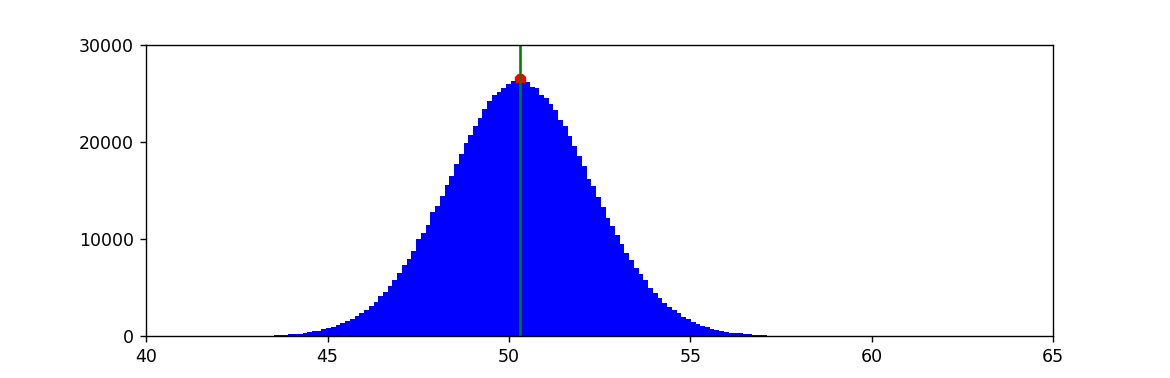

In [65]:
fig = plt.figure() 
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_ylim(0,3*(10**4))
ax1.set_xlim(40,65)

x1_major_locator=plt.MultipleLocator(5)
y1_major_locator=plt.MultipleLocator(1*(10**4))

ax1.xaxis.set_major_locator(x1_major_locator)
ax1.yaxis.set_major_locator(y1_major_locator)



In [66]:
def figure():
    ax1.hist(np.array(conver_point),bins=150,color="b")
    ax1.scatter(conver_point_mean,26500,c="r",marker="8")#y不确定
    ax1.axvline(np.mean(I), color='g')

In [67]:
figure()